##**Clustering Monkeypox Outbreak Patterns Across Selected Countries Using K-Means Clustering Algorithm**

**The purpose of this analysis is to apply K-Means clustering to categorize selected countries according to their Monkeypox outbreak characteristics. By examining patterns in case counts, deaths, and prior exposure, the analysis aims to identify distinct regional clusters that can help guide surveillance and response strategies.**



##  **Introduction**

The global resurgence of **Monkeypox** in recent years has underscored the need for timely data-driven analysis to understand outbreak dynamics across different regions.  
While the virus historically affected certain African nations, recent global transmissions have revealed complex patterns influenced by health infrastructure, travel, and prior exposure history.  

This project applies the **K-Means clustering algorithm**, an unsupervised machine learning method, to explore **global Monkeypox outbreak patterns**.  
By analyzing variables such as **confirmed cases**, **deaths**, and **previous exposure history**, this study aims to identify meaningful groupings of countries with similar outbreak profiles.  

The clustering results provide insights into how different regions align in terms of disease impact, fatality rates, and historical encounter with Monkeypox — offering valuable perspectives for global public health monitoring and response planning.

###  **Key Objectives**
- Identify clusters of countries with similar Monkeypox outbreak patterns worldwide.  
- Explore correlations between deaths, case counts, and prior exposure to understand underlying epidemiological dynamics.  
- Visualize the spatial distribution of Monkeypox clusters on a global scale.  
- Derive data-driven insights to inform health surveillance and policy interventions.


In [218]:
import pandas as pd

In [219]:
#The dataframe
df=pd.read_csv('/content/monkeypox-cases-and-deaths-by-country-as-of-august-2024.csv')
df.head()


,country,cases,deaths,category,asof
0,Aruba,3.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
1,Andorra,4.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
2,United Arab Emirates,16.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
3,Argentina,1149.0,2,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
4,Australia,334.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT


In [220]:
#general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   123 non-null    object 
 1   cases     123 non-null    float64
 2   deaths    123 non-null    int64  
 3   category  123 non-null    object 
 4   asof      123 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.9+ KB


In [221]:
#columns and the rows of the dataframe
df.shape

(123, 5)

In [222]:
#column names
df.columns

Index(['country', 'cases', 'deaths', 'category', 'asof'], dtype='object')

In [223]:
#summary statistics
df.describe(include='all')

,country,cases,deaths,category,asof
count,123,123.000000,123.000000,123,123
unique,123,NaN,NaN,2,3
top,Aruba,NaN,NaN,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
freq,1,NaN,NaN,116,118
mean,NaN,809.089431,1.682927,NaN,NaN
std,NaN,3332.331373,6.724456,NaN,NaN
min,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,4.000000,0.000000,NaN,NaN
50%,NaN,27.000000,0.000000,NaN,NaN
75%,NaN,243.000000,0.000000,NaN,NaN


In [224]:
#checking for any missing value
df.isnull().sum()

,0
country,0
cases,0
deaths,0
category,0
asof,0


In [225]:
#checking for data types
df.dtypes

,0
country,object
cases,float64
deaths,int64
category,object
asof,object


**preprocessing**

In [226]:
df.head()

,country,cases,deaths,category,asof
0,Aruba,3.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
1,Andorra,4.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
2,United Arab Emirates,16.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
3,Argentina,1149.0,2,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT
4,Australia,334.0,0,Has not historically reported mpox,Data as of 06 Aug 2024 5:30 PM EDT


dropping the unnecesary column i.e asof

In [227]:
df1 = df.drop(columns=['asof'])
df1.head()

,country,cases,deaths,category
0,Aruba,3.0,0,Has not historically reported mpox
1,Andorra,4.0,0,Has not historically reported mpox
2,United Arab Emirates,16.0,0,Has not historically reported mpox
3,Argentina,1149.0,2,Has not historically reported mpox
4,Australia,334.0,0,Has not historically reported mpox


Adding a new column named Fatality Rate

In [228]:
df1['fatality'] = (df1['deaths'] / df1['cases']).replace([float('inf'), float('nan')], 0)
display(df1.head())

,country,cases,deaths,category,fatality
0,Aruba,3.0,0,Has not historically reported mpox,0.000000
1,Andorra,4.0,0,Has not historically reported mpox,0.000000
2,United Arab Emirates,16.0,0,Has not historically reported mpox,0.000000
3,Argentina,1149.0,2,Has not historically reported mpox,0.001741
4,Australia,334.0,0,Has not historically reported mpox,0.000000


In [229]:
fatality=(df1[['country','fatality']].sort_values(by='fatality',ascending=False))
fatality.head()

,country,fatality
78,Mozambique,1.000000
26,Cuba,0.125000
117,South Africa,0.111111
21,Cameroon,0.100000
100,Sudan,0.052632


changing the category column name to historical incidence

In [230]:
df1 = df1.rename(columns={'category': 'historical incidence'})
df1.head()

,country,cases,deaths,historical incidence,fatality
0,Aruba,3.0,0,Has not historically reported mpox,0.000000
1,Andorra,4.0,0,Has not historically reported mpox,0.000000
2,United Arab Emirates,16.0,0,Has not historically reported mpox,0.000000
3,Argentina,1149.0,2,Has not historically reported mpox,0.001741
4,Australia,334.0,0,Has not historically reported mpox,0.000000


encoding the historial incidence column

In [231]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df1['historical incidence']=encoder.fit_transform(df1['historical incidence'])
df1['historical incidence']=1-df1['historical incidence']
df1.head()

,country,cases,deaths,historical incidence,fatality
0,Aruba,3.0,0,0,0.000000
1,Andorra,4.0,0,0,0.000000
2,United Arab Emirates,16.0,0,0,0.000000
3,Argentina,1149.0,2,0,0.001741
4,Australia,334.0,0,0,0.000000


scaling to bring everything closer to the mean

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df1[['cases','deaths','historical incidence']])
scaled_data[:5]

Kmeans=KMeans(n_clusters=3, random_state=42)
Kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

putting the scaled data into three clusters

In [233]:
Kmeans=KMeans(n_clusters=3, random_state=42, n_init=10)
Kmeans.fit(scaled_data)
df1['clusters'] = Kmeans.labels_
clustered_countries=df1[['country','clusters']]
print(clustered_countries.head(5))

                country  clusters
0                 Aruba         0
1               Andorra         0
2  United Arab Emirates         0
3             Argentina         0
4             Australia         0


the three clusters

In [234]:
df1['clusters'].value_counts()

,count
clusters,
0,115
2,7
1,1


**cluster interpretation**

 **0 ➡ LOWEST CASES AND LOWEST DEATHS**

 **1 ➡MAJORITY CASES AND MAJORITY DEATHS**

 **2 ➡MODERATE CASES AND MODERATE DEATHS**

###**countries and their three clusters**

In [235]:
for i in range(3):
    print(f"\nCluster {i}:")
    print(df1[df1['clusters'] == i]['country'].values)



Cluster 0:
['Aruba' 'Andorra' 'United Arab Emirates' 'Argentina' 'Australia'
 'Austria' 'Burundi' 'Belgium' 'Benin' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Canada'
 'Switzerland' 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Curaçao' 'Cyprus'
 'Czechia' 'Germany' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'Spain' 'Estonia' 'Finland' 'France' 'United Kingdom' 'Georgia'
 'Gibraltar' 'Guadeloupe' 'Greece' 'Greenland' 'Guatemala' 'Guyana'
 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran'
 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kenya' 'Cambodia'
 'South Korea' 'Laos' 'Lebanon' 'Sri Lanka' 'Lithuania' 'Luxembourg'
 'Latvia' 'Saint Martin' 'Morocco' 'Monaco' 'Moldova' 'Mexico' 'Malta'
 'Montenegro' 'Mozambique' 'Martinique' 'Malaysia' 'New Caledonia'
 'Netherlands' 'Norway' 'Nepal' 'New Zealand' 'Oman' 'Pakistan' 'Panama'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Paraguay' 'Qatar' 'Romania'
 'Russi

1. **countries in cluster 0**

In [236]:
cluster_one_countries=df1[df1['clusters']==0]['country'].values
print(cluster_one_countries)

['Aruba' 'Andorra' 'United Arab Emirates' 'Argentina' 'Australia'
 'Austria' 'Burundi' 'Belgium' 'Benin' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Canada'
 'Switzerland' 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Curaçao' 'Cyprus'
 'Czechia' 'Germany' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'Spain' 'Estonia' 'Finland' 'France' 'United Kingdom' 'Georgia'
 'Gibraltar' 'Guadeloupe' 'Greece' 'Greenland' 'Guatemala' 'Guyana'
 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran'
 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kenya' 'Cambodia'
 'South Korea' 'Laos' 'Lebanon' 'Sri Lanka' 'Lithuania' 'Luxembourg'
 'Latvia' 'Saint Martin' 'Morocco' 'Monaco' 'Moldova' 'Mexico' 'Malta'
 'Montenegro' 'Mozambique' 'Martinique' 'Malaysia' 'New Caledonia'
 'Netherlands' 'Norway' 'Nepal' 'New Zealand' 'Oman' 'Pakistan' 'Panama'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Paraguay' 'Qatar' 'Romania'
 'Russia' 'Rwanda' 

2. **Countries in Cluster 1**

In [237]:
second_cluster_countries=df1[df1['clusters']==1]['country'].values
print(second_cluster_countries)

['United States']


3. **countries in cluster 2**

In [238]:
third_cluster_countries=df1[df1['clusters']==2]['country'].values
print(Third_cluster_countries)

['Central African Republic' 'Cameroon' 'Democratic Republic of the Congo'
 'Republic of the Congo' 'Ghana' 'Liberia' 'Nigeria']


cluster characteritsics (centroids)

In [239]:
centroids = pd.DataFrame(Kmeans.cluster_centers_, columns=df1.drop(['country', 'clusters', 'fatality'], axis=1).columns)
print(centroids)

      cases    deaths  historical incidence
0 -0.081970 -0.100676             -0.245652
1  9.830760  8.707855             -0.245652
2 -0.057751  0.409977              4.070802


cluster definition based on the statistics

In [240]:
df1.groupby('clusters').mean(numeric_only=True)


,cases,deaths,historical incidence,fatality
clusters,,,,
0,537.052174,1.008696,0.0,0.012461
1,33435.000000,60.000000,0.0,0.001795
2,617.428571,4.428571,1.0,0.028931


cluster Distribution per countries based on death and cases

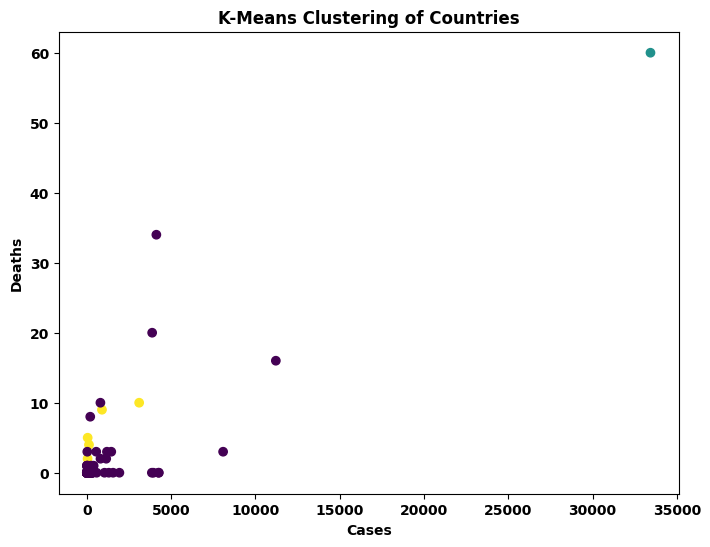

In [241]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df1['cases'], df1['deaths'], c=df1['clusters'], cmap='viridis')
plt.xlabel('Cases', fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel('Deaths', fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('K-Means Clustering of Countries', fontweight='bold')
plt.show()


In [242]:
cluster_summary = df1.groupby('clusters')[['cases', 'deaths']].mean()
print(cluster_summary)


                 cases     deaths
clusters                         
0           537.052174   1.008696
1         33435.000000  60.000000
2           617.428571   4.428571


cluster summary on cases

/tmp/ipython-input-900593996.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




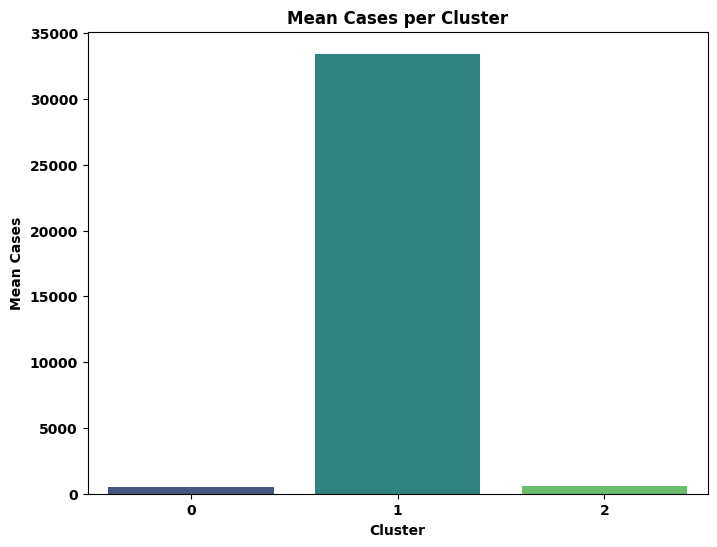

In [243]:
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_summary.index, y=cluster_summary['cases'], palette='viridis') # Use cluster_summary.index for x and cluster_summary['cases'] for y
plt.title('Mean Cases per Cluster',fontweight='bold')
plt.xlabel('Cluster', fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel('Mean Cases',fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

cluster summary on deaths

/tmp/ipython-input-679772797.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




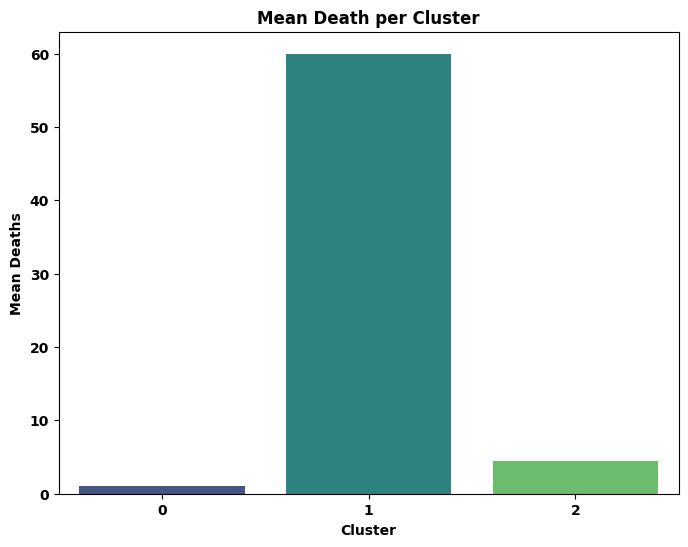

In [244]:
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_summary.index,y=cluster_summary['deaths'],palette='viridis')
plt.title('Mean Death per Cluster',fontweight='bold')
plt.xlabel('Cluster',fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel('Mean Deaths',fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

**Death Distribution across the three Clusters**

In [245]:
fig = px.choropleth(
    df1,
    locations="country",
    locationmode="country names",
    color=df1['clusters'].astype(str),
    hover_name="deaths",
    color_discrete_sequence=px.colors.qualitative.Plotly,
    title="<b>Monkeypox Clusters Across the World (K-Means)<b>"
)
fig.write_html("visualizations/monkeypox_clusters_map.html")
fig.show()

/tmp/ipython-input-43621937.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [246]:
!pip install -q kaleido

In [247]:
!pip install -U plotly>=6.1.1

**Death Distributions**

In [248]:
import plotly.express as px
fig = px.choropleth(
    df1,
    locations="country",
    locationmode="country names",
    color="deaths",
    hover_name="cases",
    color_continuous_scale=px.colors.qualitative.Set1,
    title="<b>Global Fatality Distribution of Monkeypox 2024</b>"
)

fig.update_layout(
    title_x=0.5,
    annotations=[
        dict(
            text="<b>Source: US Centers for Disease Control and Prevention (CDC) <b>| Analyzed by: <b>Brent Ochieng</b>",
            x=0.5, y=-0.15,
            xref="paper", yref="paper",
            showarrow=False,
            font=dict(size=12, color="gray")
        )
    ],
    margin=dict(b=100)
)

fig.write_html("visualizations/monkeypox_clusters_map.html")

fig.show()

/tmp/ipython-input-2751431135.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



**Top 10 countries with the highest Deaths**

In [249]:

top_10_deaths = df.groupby('country')['deaths'].sum().sort_values(ascending=False).head(10)
print(top_10_deaths)

country
United States                       60
Mexico                              34
Peru                                20
Brazil                              16
Thailand                            10
Democratic Republic of the Congo    10
Nigeria                              9
Vietnam                              8
Cameroon                             5
Ghana                                4
Name: deaths, dtype: int64


In [250]:
import seaborn as sns

/tmp/ipython-input-2481689695.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




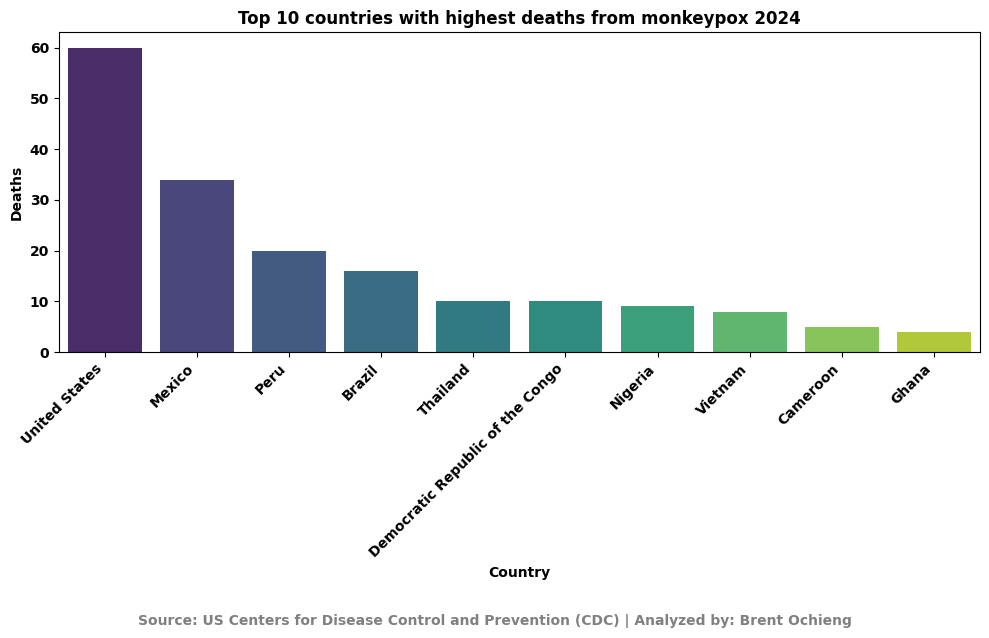

In [251]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_deaths.index, y=top_10_deaths.values, palette='viridis')

plt.title('Top 10 countries with highest deaths from monkeypox 2024', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Deaths', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

plt.figtext(
    0.5, -0.05,
    "Source: US Centers for Disease Control and Prevention (CDC) | Analyzed by: Brent Ochieng",
    wrap=True, ha='center', fontsize=10, color='gray', fontweight='bold'
)

plt.tight_layout()
plt.show()

**Top 10 countries with the Highest cases**

In [252]:
highest_cases=df.groupby('country')['cases'].sum().sort_values(ascending=False).head(10)
highest_cases

,cases
country,
United States,33435.0
Brazil,11212.0
Spain,8084.0
France,4272.0
Colombia,4249.0
Mexico,4124.0
United Kingdom,3952.0
Peru,3875.0
Germany,3857.0


/tmp/ipython-input-2537868430.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




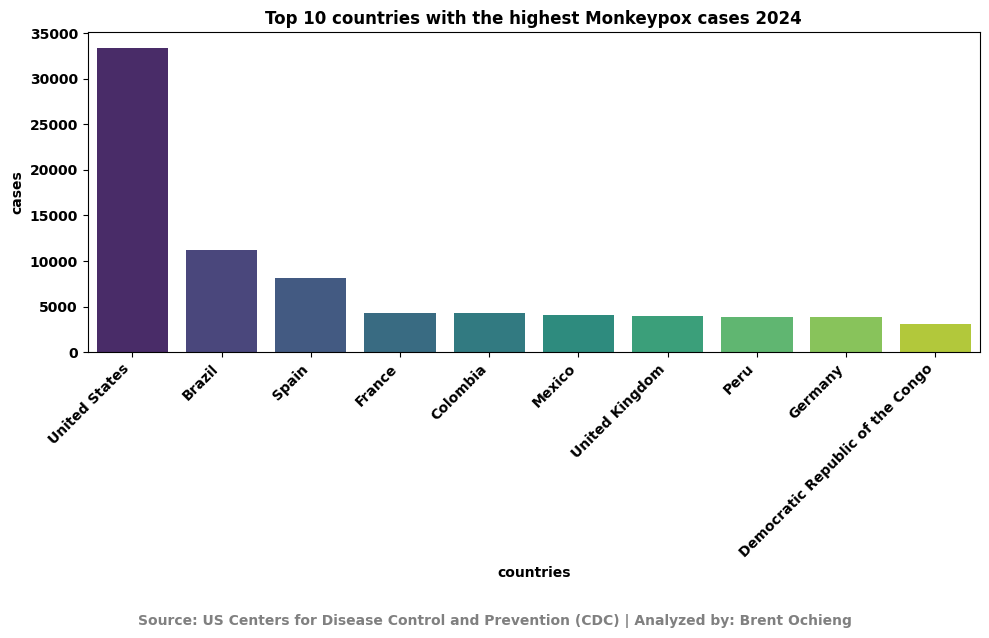

In [253]:
plt.figure(figsize=(10,6))
sns.barplot(x=highest_cases.index, y=highest_cases.values, palette='viridis')
plt.title('Top 10 countries with the highest Monkeypox cases 2024',fontweight='bold')
plt.xlabel('countries',fontweight='bold')
plt.ylabel('cases',fontweight='bold')
plt.xticks(rotation=45,fontweight='bold', ha='right')
plt.yticks(fontweight='bold')

plt.figtext(
    0.5, -0.05,
    "Source: US Centers for Disease Control and Prevention (CDC) | Analyzed by: Brent Ochieng",
    wrap=True, ha='center', fontsize=10, color='gray', fontweight='bold'
)


plt.tight_layout()
plt.show()

---

##  Summary and Insights

This analysis utilized **K-Means clustering** to examine **global patterns** in Monkeypox outbreaks using publicly available data on confirmed cases, deaths, and previous exposure.  
The clustering results revealed **three distinct groups of countries**, each representing unique outbreak characteristics and public health dynamics.

###  **Key Findings**
- Countries with **previous exposure to Monkeypox** generally reported **lower death-to-case ratios**, suggesting improved immunity or readiness from past experiences.  
- **High-burden countries**, often located in specific regions, formed a separate cluster characterized by higher fatality counts and active outbreaks.  
- A third cluster included **countries with limited or no recorded cases**, highlighting regions with either effective containment measures or minimal exposure.  
- The global visualization revealed **geographical clustering trends**, where regional similarities corresponded with outbreak intensity and historical disease presence.  

These findings emphasize the importance of **unsupervised learning techniques** such as K-Means in identifying latent structures within health data — even when no explicit labels or predefined outcomes are available.  
By uncovering natural groupings among countries, the analysis provides a foundation for **targeted disease surveillance**, **resource allocation**, and **early response strategies** for future outbreaks.

---

 **Source:** U.S. Centers for Disease Control and Prevention (CDC)  
 **Analysis and Visualization by:** *Brent Ochieng (2025)*
